In [202]:
import ast
import astpretty
from astmonkey import visitors, transformers
from IPython.display import SVG, display
import os

In [203]:
def show_tree(source, file_name, show=True):
    tree = ast.parse(source)
    node = transformers.ParentChildNodeTransformer().visit(tree)
    visitor = visitors.GraphNodeVisitor()
    visitor.visit(node)
    image_path = f'../data/graphs/{file_name}.svg'
    g = visitor.graph
#     g.set_size(("100000.0,500000.0!"))
#     g.set_dpi('200000')
    g.write_dot(f'../data/graphs/{file_name}.dot')
    g.write_svg(image_path)
    str_with_tree = astpretty.pformat(tree)
    str_path = f'../data/graphs/{file_name}.txt'
    with open(str_path, 'w') as f:
        f.write(str_with_tree)
    if show:
        display(SVG(image_path))
        print(str_with_tree)
    return visitor

### Simple example of the AST tree

In [204]:
test_program = """
import os

x=5
y=0
# x=6
for i in range(x):
    y += i   
"""

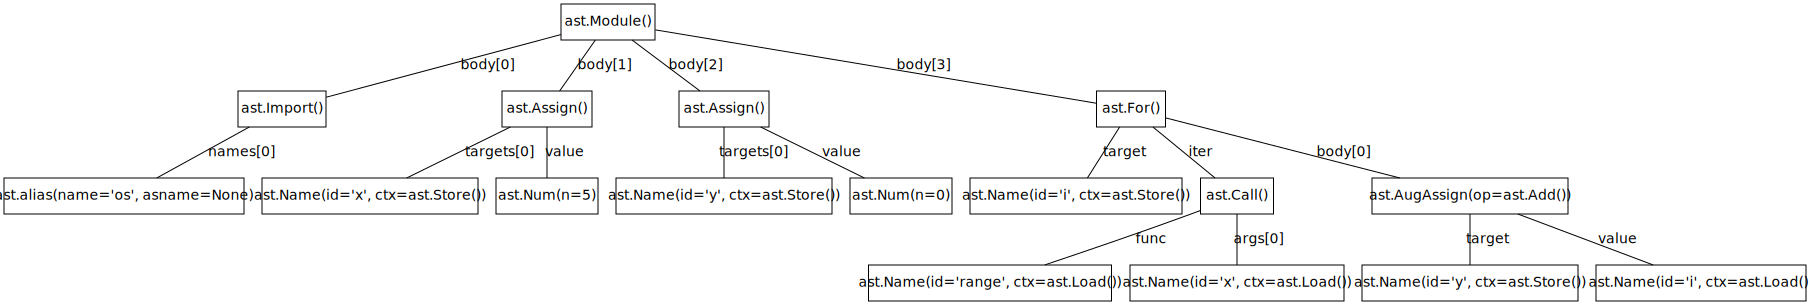

Module(
    body=[
        Import(
            lineno=2,
            col_offset=0,
            names=[alias(name='os', asname=None)],
        ),
        Assign(
            lineno=4,
            col_offset=0,
            targets=[Name(lineno=4, col_offset=0, id='x', ctx=Store())],
            value=Num(lineno=4, col_offset=2, n=5),
        ),
        Assign(
            lineno=5,
            col_offset=0,
            targets=[Name(lineno=5, col_offset=0, id='y', ctx=Store())],
            value=Num(lineno=5, col_offset=2, n=0),
        ),
        For(
            lineno=7,
            col_offset=0,
            target=Name(lineno=7, col_offset=4, id='i', ctx=Store()),
            iter=Call(
                lineno=7,
                col_offset=9,
                func=Name(lineno=7, col_offset=9, id='range', ctx=Load()),
                args=[Name(lineno=7, col_offset=15, id='x', ctx=Load())],
                keywords=[],
            ),
            body=[
                AugAssign(
      

In [205]:
v = show_tree(test_program, 'test')

## Example from real data

In [196]:
file = '../data/files/openstack/0a0d5f426e584c6a6047ce809dfd5d9985417b59/after/nova_api_ec2_cloud.py'

In [197]:
show_tree(open(file, "r").read(), os.path.split(file)[1], False)